In [139]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [140]:
data = pd.read_csv('./lianjia.csv')
data

,area,district,latitude,longitude,money,orientation,plot,street,subway,time,typ
0,42㎡,门头沟,39.941260,116.109517,2600,朝南,大峪小白楼,大峪,NaN,2019-03-03,1室0厅1卫
1,63㎡,门头沟,39.936118,116.118130,3000,朝南 北,月季园东里,滨河西区,NaN,2019-03-01,2室1厅1卫
2,82㎡,门头沟,39.939735,116.122491,4000,朝东 西,临镜苑,滨河西区,NaN,2019-03-14,2室1厅1卫
3,61㎡,门头沟,39.941235,116.115431,2800,朝东,双峪路小区,滨河西区,NaN,2019-03-03,2室1厅1卫
4,65㎡,门头沟,39.919540,116.129801,2400,朝南 北,整租,滨河西区,距离s1线-上岸849m,2019-03-06,2室1厅1卫
5,38㎡,顺义,40.124080,116.563472,3700,朝东,东亚创展国际,后沙峪,距离15号线-后沙峪1162m,2019-02-26,1房间1卫
6,58㎡,顺义,40.116534,116.669988,3500,朝南 北,整租,顺义城,NaN,2019-03-16,1室1厅1卫
7,38㎡,顺义,40.124080,116.563472,3300,朝东,整租,后沙峪,距离15号线-后沙峪1162m,2019-03-22,1房间1卫
8,36㎡,顺义,40.094933,116.560389,3600,朝西,整租,后沙峪,距离15号线-花梨坎571m,2019-03-22,1室0厅1卫
9,58㎡,顺义,40.124080,116.563472,4000,朝东,整租,后沙峪,距离15号线-后沙峪1162m,2019-01-11,2房间1卫


# 对空值初步处理

In [141]:
# 删除重复数据
data.drop_duplicates(keep='last',inplace=True)

In [142]:
# 检测有空值的列
data.isnull().any(axis=0)

area           False
district        True
latitude       False
longitude      False
money          False
orientation    False
plot           False
street          True
subway          True
time           False
typ            False
dtype: bool

In [143]:
# 检测有空值的行
data.loc[data.isnull().any(axis=1)].count()

area           5705
district       5483
latitude       5705
longitude      5705
money          5705
orientation    5705
plot           5705
street         5483
subway          132
time           5705
typ            5705
dtype: int64

### 空值集中在district /  street  /  subway  这三个参数，没有地铁信息的租房信息近30% ，没有行政区和街道的租房信息不足1%

In [144]:
# 各个行政区的租房信息
district_data = data.groupby(by='district',axis=0)['district'].count()
district_data = district_data.sort_values(ascending=False)
district_data

district
朝阳       2020
海淀       1984
丰台       1952
通州       1648
西城       1452
大兴       1328
昌平       1069
顺义        866
东城        827
房山        701
门头沟       564
石景山       493
亦庄开发区     462
Name: district, dtype: int64

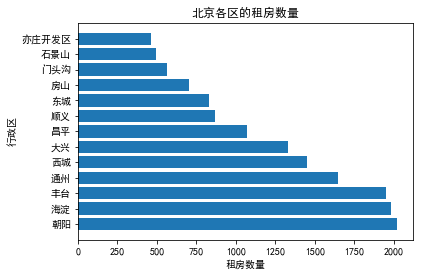

In [145]:
import matplotlib as mpl
mpl.rcParams['font.family']='simhei'
mpl.rcParams['axes.unicode_minus']=False   # 中文不显示
plt.ylabel('行政区')    
plt.xlabel('租房数量')
plt.title('北京各区的租房数量')
plt.barh(district_data.index,district_data.values)
plt.show()

In [77]:
# 房价分布图
money_data = data.groupby(by='money',axis=0)['money'].count()
money_data = district_data.sort_values(ascending=False)
money_data

money
4500      566
6500      553
5500      539
6000      514
5000      476
4000      438
7500      438
7000      434
3500      392
8000      366
8500      356
4800      302
12000     295
4300      293
3800      290
5800      288
4200      286
5200      272
6800      270
9000      236
4600      224
10000     221
5300      211
3000      209
13000     206
7800      206
3600      196
11000     193
15000     190
3300      189
         ... 
98000       1
28800       1
105000      1
110000      1
120000      1
135000      1
75600       1
6980        1
48300       1
44732       1
24600       1
24800       1
25200       1
26666       1
26737       1
26800       1
27500       1
28050       1
45692       1
28500       1
29800       1
29900       1
30800       1
31500       1
33155       1
33300       1
36500       1
37220       1
37600       1
11495       1
Name: money, Length: 301, dtype: int64

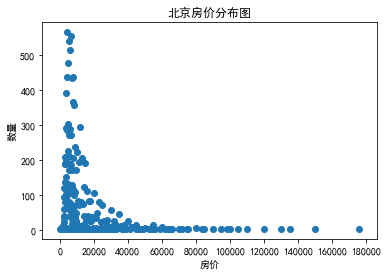

In [93]:
plt.ylabel('数量')    
plt.xlabel('房价')
plt.title('北京房价分布图')
plt.xticks(np.arange(0,200000,20000))
plt.scatter(money_data.index,money_data.values)
plt.show()

# ###房价主要集中在20000元内

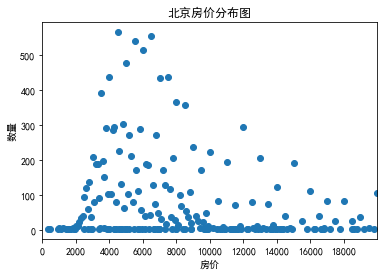

In [99]:
plt.ylabel('数量')    
plt.xlabel('房价')
plt.title('北京房价分布图')
plt.xlim(0,20000)
plt.xticks(np.arange(0,20000,2000))
plt.scatter(money_data.index,money_data.values)
plt.show()

# ####20000元内的房价又集中在4000元---8000元

In [124]:
# 户型分布图
typ_data = data.groupby(by='typ',axis=0)['typ'].count()
typ_data = typ_data.sort_values(ascending=False).head(10)
typ_data

typ
2室1厅1卫    5856
1室1厅1卫    2357
3室1厅1卫    1270
3室2厅2卫     812
1室0厅1卫     811
3室1厅2卫     708
2房间1卫      432
2室2厅1卫     422
1房间1卫      340
2室1厅2卫     338
Name: typ, dtype: int64

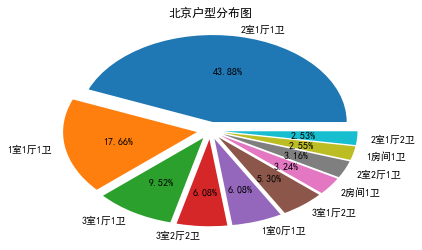

In [131]:
# 户型分布图,取前10名
plt.title('北京户型分布图')
plt.pie(typ_data.values,labels=typ_data.index,autopct='%.2f%%',explode=[0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,])
plt.show()